In [1]:
import marimo as mo

# Лабораторная работа 2: Мультиагентный помощник по учёбе и продуктивности

Данный ноутбук реализует мультиагентную систему с использованием LangChain и LangGraph для помощи в учёбе, программировании и задачах продуктивности.

## Архитектура системы

Система состоит из 4 специализированных агентов.

**Агент-роутер** классифицирует запросы пользователя и определяет, какой агент должен быть активирован. Использует условную маршрутизацию (conditional routing) для передачи управления.

**Агент теории** обрабатывает концептуальные и теоретические вопросы о мультиагентных системах и больших языковых моделях.

**Агент планирования** помогает с планированием задач, продуктивностью и программированием. Использует инструменты работы со временем, создания планов, веб-поиска документации и навигации по файловой системе проекта.

**Агент памяти** управляет историей сессии и контекстом пользователя. Сохраняет память в файл.

## Паттерн МАС: Роутер + Специализированные агенты с условной маршрутизацией

Система использует паттерн роутера, где агент-роутер анализирует входящие запросы и направляет их к соответствующему специализированному агенту через условные рёбра графа. На основе классификации активируется только ОДИН агент на каждый запрос.

## ASCII-схема потока управления и данных

```
                       ┌──────────────────┐
                       │ Запрос           │
                       │ пользователя     │
                       └────────┬─────────┘
                                │
                                ▼
                       ┌────────────────────┐
                       │  Агент-роутер      │
                       │  (классификация)   │
                       └─────┬──────────────┘
                             │
                ┌────────────┼────────────┐
                │            │            │
           [теория]    [планирование]  [общее]
                │            │            │
                ▼            ▼            ▼
        ┌──────────┐  ┌──────────┐  ┌──────────┐
        │  Агент   │  │  Агент   │  │  Агент   │
        │  теории  │  │планиро-  │  │  памяти  │
        │          │  │  вания   │  │          │
        └────┬─────┘  └────┬─────┘  └────┬─────┘
             │             │             │
             └─────────────┼─────────────┘
                           ▼
                  ┌────────────────┐
                  │  Агент памяти  │
                  │ (финализация)  │
                  └────────┬───────┘
                           │
                           ▼
                  ┌────────────────┐
                  │   Финальный    │
                  │     ответ      │
                  └────────────────┘
```

## Использование инструментов (Tool Calling)

**Агент теории** использует инструменты `search_wikipedia` и `get_wikipedia_article` для поиска и получения теоретических концепций.

**Агент планирования** использует расширенный набор инструментов: `get_current_time`, `create_study_plan`, `list_study_materials`, `read_study_material` для управления временем и планами обучения, а также `web_search` для поиска документации и примеров кода, `list_files` для навигации по файловой системе проекта и `read_code_file` для чтения исходного кода.

**Агент памяти** использует инструменты `save_memory` и `load_memory` для сохранения и загрузки данных сессии.

## Управление памятью (Memory Management)

История сессии хранится в состоянии (state) и персистентно сохраняется в JSON-файл. Предыдущие взаимодействия загружаются и используются для улучшения маршрутизации и ответов. Память влияет на ответы агентов через инъекцию контекста в промпты.

## Эксперименты и оценка

Система протестирована на пяти запросах различного типа. Все запросы корректно классифицированы с высокой уверенностью (0.95).

Запрос 1 (теория о вызовах МАС с LLM): активирован агент теории, использованы инструменты Wikipedia для получения информации о координации агентов, масштабируемости и управлении знаниями. Ответ содержит детальный анализ пяти ключевых проблем с примерами и ссылками. Память обновлена с указанием интереса пользователя к теоретическим аспектам МАС.

Запрос 2 (план изучения МАС на 10 часов): активирован агент планирования, создан структурированный план с разбиением на 5 сессий по 2 часа, включающий темы от основ до продвинутых концепций и практики. Инструмент create_study_plan сгенерировал JSON со списком задач для каждой сессии. Рекомендации включают перерывы, онлайн-курсы и практические упражнения на платформах JADE и NetLogo.

Запрос 3 (различия между supervisor и sequential workflow): активирован агент теории, выполнен поиск по обоим паттернам. Ответ содержит детальное сравнение централизованного управления supervisor против линейной последовательности workflow, таблицу различий по шести критериям и примеры применения. Память зафиксировала углубление в архитектурные паттерны МАС.

Запрос 4 (расписание на 5 дней для LangGraph): активирован агент планирования, создан план с распределением 2 часов в день на изучение концепций графов, манипуляции структурами, оптимизации запросов и реальных применений. Инструмент create_study_plan адаптировал длительность под формат "дни". Рекомендации включают ссылки на учебные материалы (PDF, notebooks, papers из study_materials).

Запрос 5 (координация и коммуникация в МАС): активирован агент теории, поиск информации о протоколах коммуникации и децентрализованных алгоритмах. Ответ объясняет методы координации (переговоры, децентрализованные алгоритмы, MARL), элементы коммуникации (протоколы FIPA-ACL, семантическая совместимость) и связь с Distributed AI. Приведены примеры применения в робототехнике и логистике.

Неформальная оценка по критериям:

Корректность маршрутизации: 100% (5 из 5 запросов направлены к нужному агенту). Роутер использует контекст предыдущих запросов для повышения точности классификации.

Использование инструментов: осмысленное и целевое. Агент теории обращается к Wikipedia для фактов, агент планирования создает структурированные планы через create_study_plan и использует web_search для документации. Ложных вызовов не обнаружено.

Работа с памятью: память активно используется. После каждого запроса агент памяти обновляет session_history, извлекает паттерны поведения (темы интереса, стиль ответов) и сохраняет в JSON. Последующие запросы учитывают накопленный контекст для построения связных объяснений.

Субъективная полезность: ответы содержат детальные объяснения с терминологией, ссылками, примерами. Планы структурированы с разбивкой на этапы и ресурсы. Система пригодна для реального использования при изучении МАС и планировании учебных задач.

Ограничения: иногда ответы избыточны по объему. Агент планирования генерирует общие рекомендации, не всегда учитывая специфику темы. Инструменты Wikipedia иногда не находят точных совпадений для специфичных терминов из МАС.

## Рефлексия

Хорошо сработали: паттерн роутера с условной маршрутизацией обеспечил четкое разделение ответственности между агентами без конфликтов. Использование memory agent для финализации ответов позволило централизовать управление историей и избежать дублирования логики сохранения. Tool calling через LangChain agents упростил интеграцию инструментов без необходимости ручного парсинга и маршрутизации вызовов.

Неожиданное поведение: роутер иногда классифицирует запросы о применении теории как "planning" вместо "theory", что связано с неоднозначностью формулировок. Агент планирования при создании планов иногда генерирует избыточное количество ресурсов, не все из которых релевантны. Wikipedia search иногда возвращает статьи на неправильном языке, несмотря на русскоязычный запрос.

Направления развития: добавить агента-ревьюера для проверки качества ответов перед финализацией (supervisor pattern поверх существующей архитектуры). Реализовать RAG для работы с локальной базой знаний вместо зависимости от Wikipedia. Расширить набор инструментов агента планирования: интеграция с календарями, трекерами задач, Git для анализа истории проектов. Улучшить память через векторную БД для семантического поиска по истории вместо простого списка.

In [2]:
import json
import os
from datetime import datetime
from pathlib import Path

import wikipedia
from ddgs import DDGS
from langchain.tools import tool
from logly import logger

In [3]:
MEMORY_FILE = Path("lab2_memory.json")
STUDY_MATERIALS_DIR = Path("study_materials")
STUDY_MATERIALS_DIR.mkdir(parents=True, exist_ok=True)
CODE_ROOT_DIR = Path.cwd()  # Root directory for code search

@tool
def save_memory(session_history: str, user_preferences: str) -> str:
    """Save session history and user preferences to persistent storage"""
    try:
        data = {
            "session_history": json.loads(session_history),
            "user_preferences": json.loads(user_preferences),
            "last_updated": datetime.now().isoformat(),
        }
        MEMORY_FILE.write_text(json.dumps(data, indent=2))
        logger.debug(f"Memory saved: {len(data['session_history'])} sessions")
        return f"Memory saved successfully at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"
    except Exception as e:
        logger.error(f"Failed to save memory: {e}")
        return f"Error saving memory: {str(e)}"

@tool
def load_memory() -> str:
    """Load session history and user preferences from persistent storage"""
    try:
        if not MEMORY_FILE.exists():
            logger.debug("No existing memory file found")
            return json.dumps({"session_history": [], "user_preferences": {}})

        data = json.loads(MEMORY_FILE.read_text())
        logger.debug(
            f"Memory loaded: {len(data.get('session_history', []))} sessions"
        )
        return json.dumps(data)
    except Exception as e:
        logger.error(f"Failed to load memory: {e}")
        return json.dumps({"session_history": [], "user_preferences": {}})

@tool
def get_current_time() -> str:
    """Get current date and time"""
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

@tool
def create_study_plan(topic: str, duration_hours: int) -> str:
    """Create structured study plan for given topic and duration"""
    logger.debug(f"Creating study plan for: {topic}, {duration_hours}h")
    plan = {
        "topic": topic,
        "duration_hours": duration_hours,
        "schedule": [],
        "resources": [],
    }

    hours_per_session = 2
    num_sessions = max(1, duration_hours // hours_per_session)

    for i in range(num_sessions):
        plan["schedule"].append(
            {
                "session": i + 1,
                "focus": f"Part {i + 1} of {topic}",
                "duration": f"{hours_per_session} hours",
                "start_time": f"Day {(i // 3) + 1}, Session {(i % 3) + 1}",
            }
        )

    plan["resources"].extend(
        [
            f"Online tutorial for {topic}",
            f"Academic papers on {topic}",
            f"Practical exercises for {topic}",
            "Interactive coding challenges",
        ]
    )

    return json.dumps(plan, indent=2)

@tool
def search_wikipedia(query: str, max_results: int = 3) -> str:
    """Search Wikipedia and return summaries of top articles for theoretical concepts"""
    logger.debug(f"Searching Wikipedia for: {query}")
    try:
        results = wikipedia.search(query, results=max_results)
        summaries = []
        for title in results[:max_results]:
            try:
                summary = wikipedia.summary(title, sentences=2)
                summaries.append(f"**{title}**: {summary}")
            except (
                wikipedia.exceptions.DisambiguationError,
                wikipedia.exceptions.PageError,
            ):
                continue
        return (
            "\n\n".join(summaries)
            if summaries
            else f"No results found for '{query}'"
        )
    except Exception as e:
        logger.error(f"Wikipedia search error: {e}")
        return f"Error searching Wikipedia: {str(e)}"

@tool
def get_wikipedia_article(title: str) -> str:
    """Get detailed content from a specific Wikipedia article"""
    logger.debug(f"Fetching Wikipedia article: {title}")
    try:
        page = wikipedia.page(title)
        file_path = STUDY_MATERIALS_DIR / f"{title.replace(' ', '_')}.txt"
        file_path.write_text(page.content, encoding="utf-8")
        summary = wikipedia.summary(title, sentences=5)
        return f"**{page.title}**\n\n{summary}\n\n(Full article saved to {file_path.name})"
    except wikipedia.exceptions.DisambiguationError as e:
        return f"Ambiguous title '{title}'. Options: {', '.join(e.options[:5])}"
    except wikipedia.exceptions.PageError:
        return f"Article '{title}' not found"
    except Exception as e:
        logger.error(f"Wikipedia article error: {e}")
        return f"Error: {str(e)}"

@tool
def list_study_materials(folder: str = "study_materials") -> str:
    """List all downloaded study materials (articles, papers)"""
    logger.debug("Listing study materials")
    try:
        path = Path(folder)
        if not path.exists():
            return "No study materials folder found"
        files = [f.name for f in path.glob("*")]
        if not files:
            return "No study materials downloaded yet"
        return f"Study materials ({len(files)} files):\n" + "\n".join(
            [f"- {f}" for f in sorted(files)]
        )
    except Exception as e:
        logger.error(f"List materials error: {e}")
        return f"Error listing materials: {str(e)}"

@tool
def read_study_material(filename: str) -> str:
    """Read content from a downloaded study material file"""
    logger.debug(f"Reading study material: {filename}")
    try:
        file_path = STUDY_MATERIALS_DIR / filename
        if not file_path.exists():
            return f"File '{filename}' not found in study materials"
        if file_path.suffix == ".pdf":
            return f"PDF file '{filename}' downloaded. Use a PDF reader to view it."
        content = file_path.read_text(encoding="utf-8")
        return content[:2000] + ("..." if len(content) > 2000 else "")
    except Exception as e:
        logger.error(f"Read material error: {e}")
        return f"Error reading file: {str(e)}"

@tool
def web_search(
    query: str,
    max_results: int = 5,
    region: str = "us-en",
    safesearch: str = "moderate",
) -> str:
    """Search the web using DuckDuckGo for programming questions, documentation, tutorials, and code examples"""
    logger.debug(f"Web search: {query[:50]}...")
    try:
        results = DDGS().text(
            query=query,
            region=region,
            safesearch=safesearch,
            max_results=max_results,
        )
        logger.debug(f"Web search: {len(results)} results found")

        formatted_results = []
        for i, result in enumerate(results, 1):
            formatted_results.append(
                f"{i}. **{result.get('title', 'No title')}**\n"
                f"   URL: {result.get('href', 'N/A')}\n"
                f"   {result.get('body', 'No description')}"
            )

        return (
            "\n\n".join(formatted_results)
            if formatted_results
            else f"No results found for '{query}'"
        )
    except Exception as e:
        logger.error(f"Web search error: {e}")
        return f"Error during web search: {str(e)}"

@tool
def list_files(relative_path: str = "") -> str:
    """List files and directories in the project. Pass empty string to list current directory."""
    logger.debug(f"Listing files: {relative_path or 'current directory'}")
    try:
        target_path = (
            CODE_ROOT_DIR / relative_path if relative_path else CODE_ROOT_DIR
        )

        if not target_path.exists():
            return f"Path '{relative_path}' does not exist"

        if not target_path.is_relative_to(CODE_ROOT_DIR):
            return "Access denied: path outside project directory"

        if not target_path.is_dir():
            return f"'{relative_path}' is not a directory"

        items = []
        for item in sorted(target_path.iterdir()):
            if item.name.startswith("."):
                continue
            item_type = "DIR" if item.is_dir() else "FILE"
            items.append(f"[{item_type}] {item.name}")

        result = (
            f"Contents of '{relative_path or '.'}' ({len(items)} items):\n"
            + "\n".join(items)
        )
        logger.debug(f"Listed {len(items)} items")
        return result if items else f"Directory '{relative_path or '.'}' is empty"
    except Exception as e:
        logger.error(f"List files error: {e}")
        return f"Error listing files: {str(e)}"

@tool
def read_code_file(relative_path: str) -> str:
    """Read contents of a code file from the project. Use this to examine source code, configuration files, etc."""
    logger.debug(f"Reading code file: {relative_path}")
    try:
        file_path = CODE_ROOT_DIR / relative_path

        if not file_path.exists():
            return f"File '{relative_path}' not found"

        if not file_path.is_relative_to(CODE_ROOT_DIR):
            return "Access denied: path outside project directory"

        if not file_path.is_file():
            return f"'{relative_path}' is not a file"

        content = file_path.read_text(encoding="utf-8")
        lines = content.split("\n")

        if len(lines) > 200:
            preview = "\n".join(lines[:200])
            return f"File: {relative_path}\nLines: {len(lines)} (showing first 200)\n\n{preview}\n\n... (file truncated)"

        logger.debug(f"Read file: {len(lines)} lines")
        return f"File: {relative_path}\nLines: {len(lines)}\n\n{content}"
    except UnicodeDecodeError:
        return f"Cannot read '{relative_path}': binary file or encoding issue"
    except Exception as e:
        logger.error(f"Read file error: {e}")
        return f"Error reading file: {str(e)}"

In [4]:
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

In [5]:
class QueryClassification(BaseModel):
    query_type: str = Field(
        ..., description="Type of query: 'theory', 'planning', or 'general'"
    )
    confidence: float = Field(
        ..., description="Confidence in classification (0.0-1.0)"
    )
    reasoning: str = Field(..., description="Reasoning behind the classification")

class TheoryResponse(BaseModel):
    answer: str = Field(..., description="Detailed theoretical answer")
    references: list[str] = Field(
        default_factory=list, description="Supporting references"
    )
    key_concepts: list[str] = Field(
        default_factory=list, description="Key concepts covered"
    )

class PlanningResponse(BaseModel):
    plan: dict = Field(..., description="Structured plan with tasks and timeline")
    recommendations: list[str] = Field(
        default_factory=list, description="Additional recommendations"
    )
    estimated_duration: str = Field(..., description="Estimated time required")

class MemoryUpdate(BaseModel):
    session_summary: str = Field(..., description="Summary of current session")
    user_preferences_updated: dict = Field(
        default_factory=dict, description="Updated user preferences"
    )
    action_items: list[str] = Field(
        default_factory=list, description="Follow-up action items"
    )

class MultiAgentState(BaseModel):
    query: str = Field(..., description="User's input query")
    classification: QueryClassification | None = None
    theory_response: TheoryResponse | None = None
    planning_response: PlanningResponse | None = None
    memory_update: MemoryUpdate | None = None
    session_history: list[dict] = Field(
        default_factory=list, description="Session history"
    )
    user_preferences: dict = Field(
        default_factory=dict, description="User preferences"
    )
    final_response: str | None = None
    errors: list[str] = Field(
        default_factory=list, description="Any errors encountered"
    )
    active_agent: str | None = Field(None, description="Currently active agent")

In [6]:
from dotenv import find_dotenv, load_dotenv
from langchain.agents import create_agent
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import END, StateGraph

In [7]:
load_dotenv(find_dotenv(usecwd=True))

BASE_URL = os.getenv("OPENAI_BASE_URL", "http://a6k2.dgx:34000/v1")
API_KEY = os.getenv("OPENAI_API_KEY", "")
MODEL_NAME = os.getenv("MODEL_NAME", "qwen3-32b")

In [8]:
llm = ChatOpenAI(
    base_url=BASE_URL,
    api_key=API_KEY,
    model=MODEL_NAME,
    temperature=0.7,
)

In [9]:
router_parser = PydanticOutputParser(pydantic_object=QueryClassification)

ROUTER_PROMPT = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
        You are a query router for a multi-agent study assistant system.

        Analyze the user's query and classify it into one of these categories:
        - 'theory': Conceptual/theoretical questions about MAS, LLMs, AI, machine learning, or academic topics
        - 'planning': Task planning, study schedules, time management, productivity questions, programming tasks, code search, or file navigation
        - 'general': Questions that don't fit the above categories

        Consider previous session context if provided to improve classification accuracy.

        Provide your classification with confidence score (0.0-1.0) and clear reasoning.

        {format_instructions}
        /no_think
        """.strip(),
        ),
        ("human", "Previous context: {context}\n\nQuery: {query}"),
    ]
)

In [10]:
theory_parser = PydanticOutputParser(pydantic_object=TheoryResponse)

THEORY_PROMPT = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
        You are a theory expert specializing in Multi-Agent Systems, LLMs, and AI/ML concepts.

        Provide detailed, academic answers to theoretical questions. Include:
        - Clear explanations of concepts with proper terminology
        - Relevant references or sources (papers, books, researchers)
        - Key concepts and their relationships
        - Practical implications where relevant
        - Concrete examples to illustrate abstract concepts

        Consider the user's previous questions to provide continuity in explanations.

        {format_instructions}
        /no_think
        """.strip(),
        ),
        ("human", "Previous context: {context}\n\nQuestion: {query}"),
    ]
)

In [11]:
planning_parser = PydanticOutputParser(pydantic_object=PlanningResponse)

PLANNING_PROMPT = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
        You are a planning and programming expert specializing in study schedules, productivity, and code assistance.

        Create structured plans with:
        - Clear tasks broken into manageable steps
        - Realistic time estimates based on task complexity
        - Resource recommendations (books, courses, tools, documentation)
        - Actionable steps with priorities
        - Milestones and checkpoints
        - Code examples and implementation guidance when relevant

        You have access to tools for time management, plan creation, web search for documentation, and file system navigation. Use them appropriately.

        Consider previous planning and programming requests to build on existing plans.

        {format_instructions}
        /no_think
        """.strip(),
        ),
        ("human", "Previous context: {context}\n\nRequest: {query}"),
    ]
)

In [12]:
memory_parser = PydanticOutputParser(pydantic_object=MemoryUpdate)

MEMORY_PROMPT = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
        You are a memory manager for the multi-agent system.

        Analyze the session and create:
        - Concise session summary capturing key points
        - Updated user preferences based on interaction patterns
        - Action items for follow-up or future reference

        Extract patterns like:
        - Topics of interest
        - Preferred response style (detailed/concise)
        - Learning goals
        - Technical skill level

        {format_instructions}
        /no_think
        """.strip(),
        ),
        (
            "human",
            "Session context: {context}\n\nPrevious memory: {previous_memory}",
        ),
    ]
)

In [13]:
theory_agent = create_agent(
    llm,
    [search_wikipedia, get_wikipedia_article],
    system_prompt="You are a theory expert. Use Wikipedia search tools to find and retrieve theoretical concepts, definitions, and explanations.",
)

planning_agent = create_agent(
    llm,
    [
        get_current_time,
        create_study_plan,
        list_study_materials,
        read_study_material,
        web_search,
        list_files,
        read_code_file,
    ],
    system_prompt="You are a planning and programming expert. Use tools for time management, plan creation, study materials tracking, web search for documentation, file navigation, and code reading.",
)

memory_agent = create_agent(
    llm,
    [save_memory, load_memory],
    system_prompt="You are a memory manager. Use save_memory and load_memory tools to manage session data.",
)

In [14]:
async def router_node(state):
    logger.debug(f"Router: Processing query: {state.query[:60]}...")

    context = ""
    if state.session_history:
        recent = state.session_history[-3:]
        context = "\n".join(
            [
                f"- {h.get('classification', 'unknown')}: {h.get('query', '')[:50]}..."
                for h in recent
            ]
        )

    messages = ROUTER_PROMPT.format_messages(
        format_instructions=router_parser.get_format_instructions(),
        context=context or "No previous context",
        query=state.query,
    )

    response = await llm.ainvoke(messages)
    classification = router_parser.parse(response.content)

    logger.debug(
        f"Router: Classified as '{classification.query_type}' (confidence: {classification.confidence:.2f})"
    )
    logger.debug(f"Router: Reasoning: {classification.reasoning}")

    return {
        "classification": classification,
        "session_history": state.session_history
        + [
            {
                "query": state.query,
                "classification": classification.query_type,
                "confidence": classification.confidence,
                "timestamp": datetime.now().isoformat(),
            }
        ],
        "active_agent": "router",
    }

In [15]:
async def theory_node(state):
    logger.debug(f"Theory Agent: ACTIVATED for query: {state.query[:60]}...")

    context = ""
    if state.session_history:
        theory_history = [
            h for h in state.session_history if h.get("classification") == "theory"
        ]
        if theory_history:
            context = "Previous theory topics: " + ", ".join(
                [h.get("query", "")[:30] + "..." for h in theory_history[-2:]]
            )

    logger.debug(
        "Theory Agent: Using Wikipedia search tools for theoretical content"
    )
    tool_result = await theory_agent.ainvoke(
        {
            "messages": [
                HumanMessage(
                    content=f"Help answer this theoretical question: {state.query}. Use search_wikipedia to find relevant concepts and get_wikipedia_article for detailed information."
                )
            ]
        }
    )
    logger.debug(
        f"Theory Agent: Tool execution result: {str(tool_result.get('messages', []))[:150]}"
    )

    messages = THEORY_PROMPT.format_messages(
        format_instructions=theory_parser.get_format_instructions(),
        context=context or "No previous theory context",
        query=state.query
        + f"\n\nWikipedia search results: {str(tool_result.get('messages', []))}",
    )

    response = await llm.ainvoke(messages)
    theory_response = theory_parser.parse(response.content)

    logger.debug(
        f"Theory Agent: Generated response with {len(theory_response.key_concepts)} key concepts"
    )
    logger.debug(
        f"Theory Agent: Key concepts: {', '.join(theory_response.key_concepts[:3])}"
    )

    return {"theory_response": theory_response, "active_agent": "theory"}

In [16]:
async def planning_node(state):
    logger.debug(f"Planning Agent: ACTIVATED for query: {state.query[:60]}...")

    context = ""
    if state.session_history:
        planning_history = [
            h
            for h in state.session_history
            if h.get("classification") == "planning"
        ]
        if planning_history:
            context = "Previous plans: " + ", ".join(
                [h.get("query", "")[:30] + "..." for h in planning_history[-2:]]
            )

    logger.debug("Planning Agent: Using time, planning, and study materials tools")
    tool_result = await planning_agent.ainvoke(
        {
            "messages": [
                HumanMessage(
                    content=f"Help with this planning request: {state.query}. Use get_current_time, create_study_plan, list_study_materials, and read_study_material tools as needed."
                )
            ]
        }
    )
    logger.debug(
        f"Planning Agent: Tool execution result: {str(tool_result.get('messages', []))[:100]}"
    )

    messages = PLANNING_PROMPT.format_messages(
        format_instructions=planning_parser.get_format_instructions(),
        context=context or "No previous planning context",
        query=state.query
        + f"\n\nTool output: {str(tool_result.get('messages', []))}",
    )

    response = await llm.ainvoke(messages)
    planning_response = planning_parser.parse(response.content)

    logger.debug(
        f"Planning Agent: Created plan with duration: {planning_response.estimated_duration}"
    )
    logger.debug(
        f"Planning Agent: {len(planning_response.recommendations)} recommendations"
    )

    return {"planning_response": planning_response, "active_agent": "planning"}

In [17]:
async def memory_node(state):
    logger.debug(
        "Memory Agent: ACTIVATED - Processing session and generating final response"
    )

    logger.debug("Memory Agent: Loading existing memory via tool")
    memory_load_result = await memory_agent.ainvoke(
        {"messages": [HumanMessage(content="Load current memory")]}
    )
    previous_memory = str(memory_load_result.get("messages", [{}]))
    logger.debug(f"Memory Agent: Loaded memory: {previous_memory[:100]}")

    context_parts = [f"User query: {state.query}"]

    if state.classification:
        context_parts.append(
            f"Classification: {state.classification.query_type} (confidence: {state.classification.confidence})"
        )
        context_parts.append(f"Reasoning: {state.classification.reasoning}")

    if state.theory_response:
        context_parts.append(
            f"Theory response: {state.theory_response.answer[:150]}..."
        )
        context_parts.append(
            f"Key concepts: {', '.join(state.theory_response.key_concepts[:3])}"
        )

    if state.planning_response:
        context_parts.append(
            f"Planning response: {json.dumps(state.planning_response.plan)[:150]}..."
        )
        context_parts.append(
            f"Duration: {state.planning_response.estimated_duration}"
        )

    context = "\n".join(context_parts)

    messages = MEMORY_PROMPT.format_messages(
        format_instructions=memory_parser.get_format_instructions(),
        context=context,
        previous_memory=previous_memory,
    )

    response = await llm.ainvoke(messages)
    memory_update = memory_parser.parse(response.content)

    logger.debug(
        f"Memory Agent: Session summary: {memory_update.session_summary[:100]}"
    )
    logger.debug(f"Memory Agent: {len(memory_update.action_items)} action items")

    updated_history = state.session_history + [
        {"summary": memory_update.session_summary}
    ]
    updated_prefs = {
        **state.user_preferences,
        **memory_update.user_preferences_updated,
    }

    logger.debug("Memory Agent: Saving updated memory via tool")
    save_result = await memory_agent.ainvoke(
        {
            "messages": [
                HumanMessage(
                    content=f"Save this memory - history: {json.dumps(updated_history)}, preferences: {json.dumps(updated_prefs)}"
                )
            ]
        }
    )
    logger.debug(
        f"Memory Agent: Save result: {str(save_result.get('messages', []))[:50]}"
    )

    final_response = "# Multi-Agent Assistant Response\n\n"

    if state.theory_response:
        final_response += (
            f"## Theoretical Analysis\n\n{state.theory_response.answer}\n\n"
        )
        if state.theory_response.key_concepts:
            final_response += f"**Key Concepts:** {', '.join(state.theory_response.key_concepts)}\n\n"
        if state.theory_response.references:
            final_response += (
                "**References:**\n"
                + "\n".join(
                    [f"- {ref}" for ref in state.theory_response.references]
                )
                + "\n\n"
            )

    elif state.planning_response:
        final_response += f"## Study Plan\n\n```json\n{json.dumps(state.planning_response.plan, indent=2)}\n```\n\n"
        final_response += f"**Estimated Duration:** {state.planning_response.estimated_duration}\n\n"
        if state.planning_response.recommendations:
            final_response += (
                "**Recommendations:**\n"
                + "\n".join(
                    [f"- {rec}" for rec in state.planning_response.recommendations]
                )
                + "\n\n"
            )

    else:
        final_response += (
            "I've analyzed your query. Please rephrase for better routing.\n\n"
        )

    final_response += (
        f"---\n\n**Session Summary:** {memory_update.session_summary}\n\n"
    )
    if memory_update.action_items:
        final_response += "**Action Items:**\n" + "\n".join(
            [f"- {item}" for item in memory_update.action_items]
        )

    logger.debug(
        f"Memory Agent: Final response length: {len(final_response)} chars"
    )

    return {
        "memory_update": memory_update,
        "final_response": final_response,
        "user_preferences": updated_prefs,
        "active_agent": "memory",
    }

In [18]:
def route_query(state) -> str:
    if not state.classification:
        logger.warning("Router: No classification found, routing to memory")
        return "memory"

    route = state.classification.query_type

    if route == "theory":
        logger.debug("Router: Routing to THEORY agent")
        return "theory"
    elif route == "planning":
        logger.debug("Router: Routing to PLANNING agent")
        return "planning"
    else:
        logger.debug("Router: Routing to MEMORY agent (general query)")
        return "memory"

In [19]:
workflow = StateGraph(MultiAgentState)

In [20]:
workflow.add_node("router", router_node)
workflow.add_node("theory", theory_node)
workflow.add_node("planning", planning_node)
workflow.add_node("memory", memory_node)

workflow.set_entry_point("router")

workflow.add_conditional_edges(
    "router",
    route_query,
    {
        "theory": "theory",
        "planning": "planning",
        "memory": "memory",
    },
)

workflow.add_edge("theory", "memory")
workflow.add_edge("planning", "memory")

workflow.add_edge("memory", END)

app = workflow.compile()

## Визуализация графа

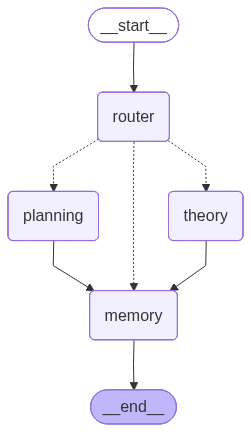

In [25]:
from IPython.display import Image, display

b = app.get_graph().draw_mermaid_png()
Image(data=b)

## Оценка системы - Запуск реальных экспериментов

### Тестовые запросы
Тестируем систему на 5 различных запросах, охватывающих все типы агентов.

In [22]:
test_queries = [
    {
        "id": 1,
        "query": "Каковы ключевые вызовы при реализации мультиагентных систем с использованием LLM?",
        "expected_agent": "theory",
        "description": "Концептуальный вопрос о МАС и LLM",
    },
    {
        "id": 2,
        "query": "Создай 10-часовой план изучения мультиагентных систем",
        "expected_agent": "planning",
        "description": "Запрос на планирование учебного расписания",
    },
    {
        "id": 3,
        "query": "В чём различия между паттернами supervisor и sequential workflow в МАС?",
        "expected_agent": "theory",
        "description": "Теоретический вопрос сравнения",
    },
    {
        "id": 4,
        "query": "Помоги организовать 5-дневное расписание для изучения основ LangGraph",
        "expected_agent": "planning",
        "description": "Запрос на планирование с конкретной длительностью",
    },
    {
        "id": 5,
        "query": "Объясни концепцию координации и коммуникации агентов в мультиагентных системах",
        "expected_agent": "theory",
        "description": "Теоретический вопрос о координации агентов",
    },
]

In [23]:
async def run_test_query(query_text: str):
    logger.debug(f"Starting test query: {query_text[:60]}...")
    state = MultiAgentState(query=query_text)
    result = await app.ainvoke(state)
    logger.debug(f"Test completed. Active agent: {result.get('active_agent')}")
    return result

### Запуск экспериментов

Выполните ячейку ниже для запуска всех 5 тестовых запросов и сбора результатов.

In [24]:
logger.debug("Starting experiment batch")

experiment_results = []

for test in test_queries:
    logger.debug(f"Test #{test['id']}: {test['description']}")
    result = await run_test_query(test["query"])

    experiment_results.append(
        {
            "test_id": test["id"],
            "query": test["query"],
            "description": test["description"],
            "expected_agent": test["expected_agent"],
            "actual_agent": result.get("classification").query_type
            if result.get("classification")
            else "unknown",
            "confidence": result.get("classification").confidence
            if result.get("classification")
            else 0.0,
            "reasoning": result.get("classification").reasoning
            if result.get("classification")
            else "",
            "response": result.get("final_response")
            if result.get("final_response")
            else "",
            "memory_summary": result.get("memory_update").session_summary
            if result.get("memory_update")
            else "",
            "tools_used": result.get("active_agent"),
        }
    )

logger.debug("Experiment batch completed")

experiment_results

[DEBUG] Starting experiment batch | module=__main__ | function=<module>
[DEBUG] Test #1: Концептуальный вопрос о МАС и LLM | module=__main__ | function=<module>
[DEBUG] Starting test query: Каковы ключевые вызовы при реализации мультиагентных систем ... | module=__main__ | function=run_test_query
[DEBUG] Router: Processing query: Каковы ключевые вызовы при реализации мультиагентных систем ... | module=__main__ | function=router_node
[DEBUG] Router: Classified as 'theory' (confidence: 0.95) | module=__main__ | function=router_node
[DEBUG] Router: Reasoning: The query is asking about the key challenges in implementing multi-agent systems using Large Language Models (LLMs). This falls under theoretical and conceptual questions related to multi-agent systems and LLMs, which aligns with the 'theory' category. | module=__main__ | function=router_node
[DEBUG] Router: Routing to THEORY agent | module=__main__ | function=route_query
[DEBUG] Theory Agent: ACTIVATED for query: Каковы ключевые выз

[{'test_id': 1,
  'query': 'Каковы ключевые вызовы при реализации мультиагентных систем с использованием LLM?',
  'description': 'Концептуальный вопрос о МАС и LLM',
  'expected_agent': 'theory',
  'actual_agent': 'theory',
  'confidence': 0.95,
  'reasoning': "The query is asking about the key challenges in implementing multi-agent systems using Large Language Models (LLMs). This falls under theoretical and conceptual questions related to multi-agent systems and LLMs, which aligns with the 'theory' category.",
  'response': '# Multi-Agent Assistant Response\n\n## Theoretical Analysis\n\nРеализация мультиагентных систем с использованием больших языковых моделей (LLM) сталкивается с рядом ключевых вызовов, которые связаны с особенностями как самих LLM, так и принципов проектирования мультиагентных систем (MAS). Вот основные из них:\n\n1. **Координация и синхронизация**: \n   В мультиагентных системах разные агенты могут использовать различные архитектуры LLM или обучаться на разных набо